In [20]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

k = 3
np.random.seed(42)

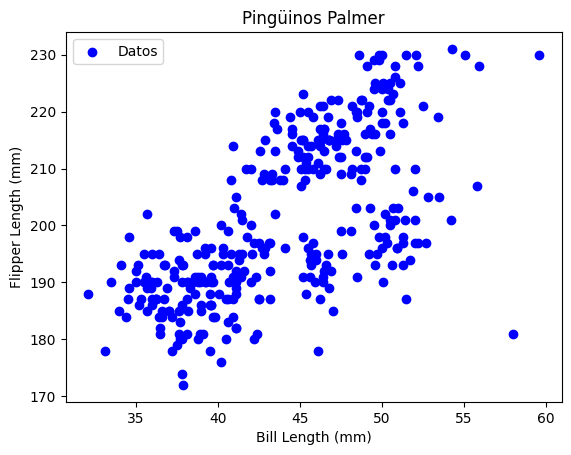

In [21]:
penguins = sns.load_dataset("penguins")

penguins = penguins[['bill_length_mm', 'flipper_length_mm']].dropna()

x = penguins['bill_length_mm'].to_numpy()
y = penguins['flipper_length_mm'].to_numpy()

#Maximas iteraciones
iteraciones_max = 200

#graficar los datos solo para verlos
plt.scatter(x, y, color='blue', label='Datos')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Pingüinos Palmer')
plt.legend()
plt.show()

In [22]:
#INICIALIZACIÓN DE CENTROIDES
i=1
centroides = []#Lista de centroides
while i <= k:
    value = random.randint(0,len(x)-1) #1 punto al azar de los 100 que tenemos
    centroides.append([x[value],y[value]])#agregar el punto al diccionario
    i += 1

#Lógica para no repetir centroides

#print centroides
for centroide in centroides:
    print(centroide[0], centroide[1])


42.0 210.0
44.4 219.0
36.4 184.0


In [23]:
def Calcular_distancia(x_punto,y_punto, centroides,k):
    distancias = []
    i = 0
    while i < k:
        distancia = (x_punto - centroides[i][0])**2 + (y_punto - centroides[i][1])**2
        distancia = math.sqrt(distancia)
        distancias.append(distancia)
        i += 1
    
    
    
    minima = min(distancias)
    cluster_escogido = distancias.index(minima) 
    return cluster_escogido

def Calcular_distancia_centroides(centroides_antiguos, centroides,k):
    distancias = []
    i = 0
    while i < k:
        distancia = (centroides_antiguos[i][0] - centroides[i][0])**2 + (centroides_antiguos[i][1] - centroides[i][1])**2
        distancia = math.sqrt(distancia)
        distancias.append(distancia)
        i += 1
    return distancias

In [24]:
#Crear lista de clusters
Clusters = []
i=0
while i < k:
    cluster = [] #Lista de los puntos que se añaden al grupo
    Clusters.append(cluster)
    i += 1
#Añadir puntos a clusters
def Hacer_Clusters(coordenadas_x,coordenadas_y,centroides, Clusters):
    i = 0
    while i < len(coordenadas_x):
        punto = [coordenadas_x[i],coordenadas_y[i]]
        cluster_escogido = Calcular_distancia(coordenadas_x[i],coordenadas_y[i], centroides,k)
        Clusters[cluster_escogido].append(punto)
        i += 1


    

In [25]:
#Recalcular centroides
for centroide in centroides:
    print(centroide[0], centroide[1])

print('______________')

def Recalcular_Centroides(k, Clusters, centroides):
    suma_x = 0
    suma_y = 0
    i = 0
    centroides_antiguos = [c[:] for c in centroides]
    while i < k:
        j = 0
        suma_x=0
        suma_y=0
        while j < len(Clusters[i]):
            suma_x += Clusters[i][j][0]
            suma_y += Clusters[i][j][1]
            j+=1
        if len(Clusters[i]) != 0:
            centroides[i][0] = suma_x/(len(Clusters[i]))
            centroides[i][1] = suma_y/(len(Clusters[i]))
        else:
            value = random.randint(0,len(x)-1)
            centroides[i] = [x[value],y[value]]
            
        i+=1
    Distancias_Clusters=Calcular_distancia_centroides(centroides_antiguos, centroides, k)
    continue_bool = any(dist > 0.001 for dist in Distancias_Clusters)
    return continue_bool
    


for centroide in centroides:
    print(centroide[0], centroide[1])




42.0 210.0
44.4 219.0
36.4 184.0
______________
42.0 210.0
44.4 219.0
36.4 184.0


In [26]:
def k_means(k,Clusters,centroides,x_punto,y_punto,iteraciones_max):
    i = 0
    continue_bool = True
    while i < iteraciones_max and continue_bool is True:
        for cluster in Clusters:
            cluster.clear()
        Hacer_Clusters(x_punto, y_punto, centroides, Clusters)
        continue_bool = Recalcular_Centroides(k, Clusters,centroides)
        print(f"Iteración {i+1}:")
        for c in centroides:
            print(c)
        i+=1


In [27]:
k_means(k,Clusters,centroides,x,y,iteraciones_max)

Iteración 1:
[np.float64(46.16464646464646), np.float64(204.34343434343435)]
[np.float64(48.48690476190476), np.float64(220.42857142857142)]
[np.float64(40.11383647798742), np.float64(188.47169811320754)]
Iteración 2:
[np.float64(46.66373626373627), np.float64(203.83516483516485)]
[np.float64(48.239999999999995), np.float64(219.95555555555555)]
[np.float64(39.95838509316769), np.float64(188.62111801242236)]
Iteración 3:
[np.float64(46.661797752808994), np.float64(203.0561797752809)]
[np.float64(48.18105263157894), np.float64(219.54736842105262)]
[np.float64(39.817721518987334), np.float64(188.50632911392404)]
Iteración 4:
[np.float64(46.72637362637363), np.float64(202.28571428571428)]
[np.float64(48.08979591836734), np.float64(219.31632653061226)]
[np.float64(39.58431372549018), np.float64(188.31372549019608)]
Iteración 5:
[np.float64(46.60217391304347), np.float64(201.8913043478261)]
[np.float64(48.042999999999985), np.float64(219.15)]
[np.float64(39.530666666666654), np.float64(188.1

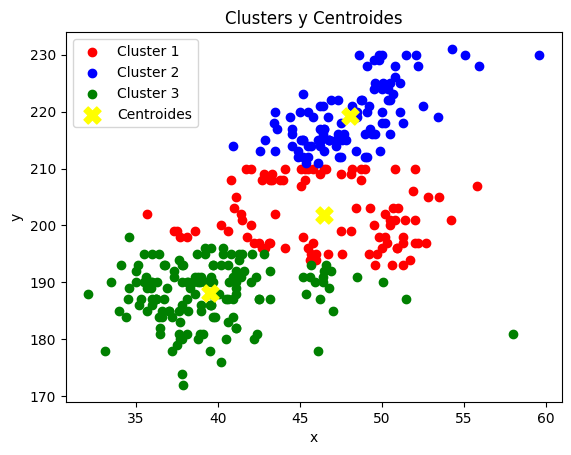

In [28]:
#GRaficar el data set con centroides ya finalizados
# Lista de colores para los clusters
colores = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray']

# Graficar los clusters por color
for i, cluster in enumerate(Clusters):
    cluster_x = [p[0] for p in cluster]
    cluster_y = [p[1] for p in cluster]
    plt.scatter(cluster_x, cluster_y, color=colores[i % len(colores)], label=f'Cluster {i+1}')

# Graficar los centroides
centroides_x = [c[0] for c in centroides]
centroides_y = [c[1] for c in centroides]
plt.scatter(centroides_x, centroides_y, color='yellow', s=150, marker='X', label='Centroides')

# Configuración de la gráfica
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clusters y Centroides')
plt.legend()
plt.show()

<h2>IMPLEMENTACIÓN CON LIBRERIAS</h2>

In [29]:
from sklearn.cluster import KMeans

In [30]:
datos = np.column_stack((x, y))

# Número de clusters
k = 3

# Crear y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(datos)

# Obtener etiquetas de cada punto y los centroides
etiquetas = kmeans.labels_
centroides = kmeans.cluster_centers_


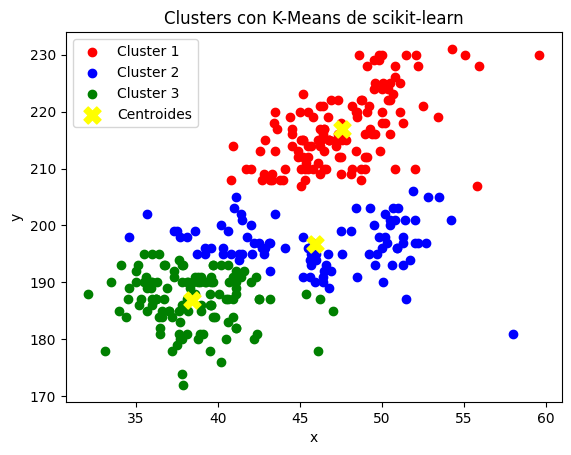

In [31]:
# Lista de colores para los clusters
colores = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray']

# Graficar los clusters
for i in range(k):
    cluster_i = datos[etiquetas == i]
    plt.scatter(cluster_i[:,0], cluster_i[:,1], color=colores[i % len(colores)], label=f'Cluster {i+1}')

# Graficar los centroides
plt.scatter(centroides[:,0], centroides[:,1], color='yellow', s=150, marker='X', label='Centroides')

# Configuración de la gráfica
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clusters con K-Means de scikit-learn')
plt.legend()
plt.show()